# 📚 Imports
---

In [ ]:
#!pip install -U --pre pycaret

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.classify_method import data_cleaning_suggestions
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pycaret.classification import *

# 📖 Data
---

In [2]:
df = pd.read_csv('data/breast_cancer_survival.csv')

In [3]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

## Patient Status Count

<AxesSubplot:xlabel='Patient_Status', ylabel='count'>

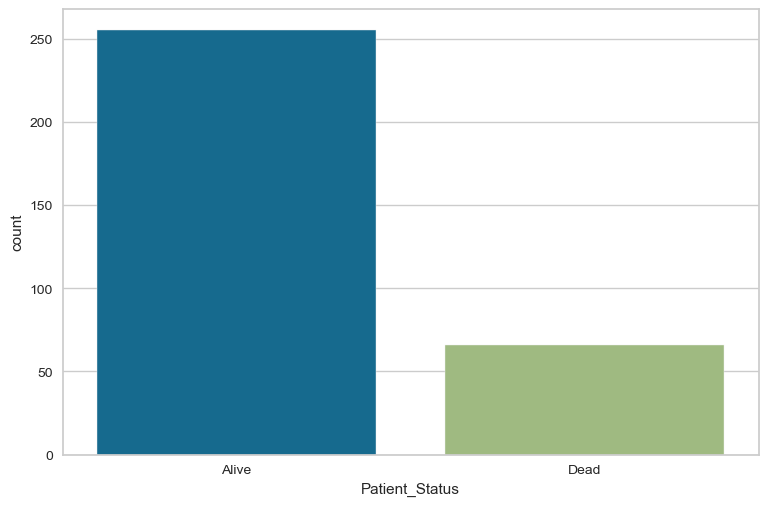

In [5]:
sns.countplot(x = df['Patient_Status'])

## Correlation map

<AxesSubplot:>

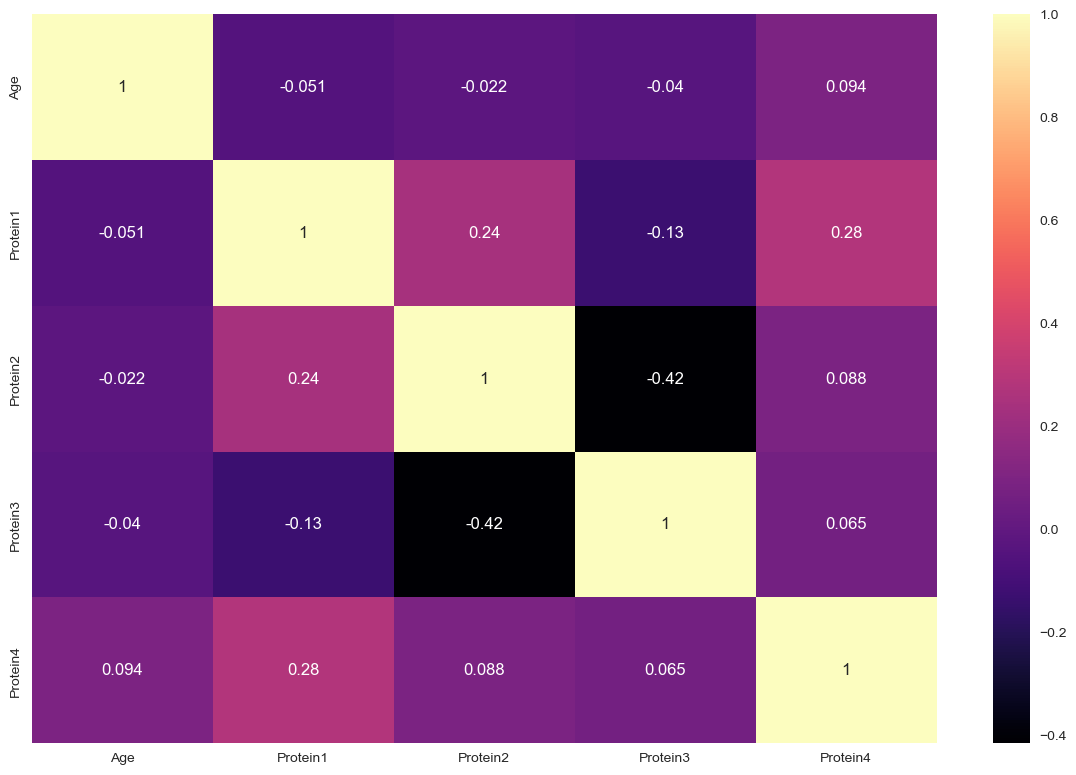

In [8]:
plt.figure(figsize = (13, 9))
sns.heatmap(df.corr(), annot = True, cmap = 'magma')

## Data specifications

In [9]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Protein2,334,float64,0,0.000000,100.000000,0,
Protein3,334,float64,0,0.000000,100.000000,0,
Protein1,333,float64,0,0.000000,99.700599,0,
Protein4,333,float64,0,0.000000,99.700599,0,
Date_of_Last_Visit,285,object,17,5.089820,85.329341,1,"combine rare categories, fill missing, fix mixed data types"
Date_of_Surgery,181,object,0,0.000000,54.191617,1,combine rare categories
Age,57,int64,0,0.000000,17.065868,0,
Surgery_type,4,object,0,0.000000,1.197605,66,
Tumour_Stage,3,object,0,0.000000,0.898204,64,
Histology,3,object,0,0.000000,0.898204,12,


# 🧹 Data preprocessing
---

In [10]:
df.dropna(inplace = True)
df.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis = 1, inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder

list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

# ✂️ Split Train and Test
---

In [12]:
X = df.drop('Patient_Status', axis = 1)
y = df['Patient_Status']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

# ⚖️ Data balancing

In [13]:
smt = SMOTE(random_state = 0)
xtrain_res, ytrain_res = smt.fit_resample(xtrain, ytrain)

print(f'Distribution BEFORE balancing:\n{ytrain.value_counts()}')
print()
print(f'Distribution AFTER balancing:\n{ytrain_res.value_counts()}')

Distribution BEFORE balancing:
0    191
1     46
Name: Patient_Status, dtype: int64

Distribution AFTER balancing:
0    191
1    191
Name: Patient_Status, dtype: int64


# 📋📋 Comparing models
---

In [14]:
train_dados = pd.concat([xtrain_res, ytrain_res], axis = 1)

s = setup(data = train_dados, target = 'Patient_Status', session_id = 0, normalize = True)

,Description,Value
0,Session id,0
1,Target,Patient_Status
2,Target type,Binary
3,Original data shape,"(382, 13)"
4,Transformed data shape,"(382, 13)"
5,Transformed train set shape,"(267, 13)"
6,Transformed test set shape,"(115, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8430,0.9223,0.8967,0.8155,0.8513,0.6858,0.6960,0.7250
lightgbm,Light Gradient Boosting Machine,0.8281,0.8779,0.8808,0.8043,0.8369,0.6558,0.6667,0.8090
xgboost,Extreme Gradient Boosting,0.8209,0.8975,0.8665,0.8020,0.8283,0.6409,0.6541,0.6560
rf,Random Forest Classifier,0.8093,0.9094,0.8434,0.7920,0.8140,0.6180,0.6260,0.8070
gbc,Gradient Boosting Classifier,0.7756,0.8484,0.8280,0.7594,0.7857,0.5505,0.5642,0.7830
knn,K Neighbors Classifier,0.7454,0.7999,0.9110,0.6879,0.7815,0.4897,0.5269,0.6560
ada,Ada Boost Classifier,0.7301,0.7735,0.7610,0.7164,0.7296,0.4599,0.4715,0.6760
dt,Decision Tree Classifier,0.7269,0.7277,0.7555,0.7289,0.7365,0.4545,0.4617,0.6850
nb,Naive Bayes,0.6774,0.7954,0.9484,0.6209,0.7493,0.3531,0.4103,0.6630
lr,Logistic Regression,0.6329,0.6977,0.6709,0.6360,0.6472,0.2641,0.2709,1.3850


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=0, verbose=0, warm_start=False)

## 📈 Predicts

In [16]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9808,1.0000,0.8667,0.9286,0.8525,0.8619
1,0.8148,0.8462,0.8462,0.7857,0.8148,0.6301,0.6319
2,0.8148,0.9176,0.8462,0.7857,0.8148,0.6301,0.6319
3,0.8148,0.9505,0.9286,0.7647,0.8387,0.6260,0.6424
4,0.7407,0.8626,0.7143,0.7692,0.7407,0.4822,0.4835
5,0.9259,0.9945,1.0000,0.8750,0.9333,0.8508,0.8605
6,0.7778,0.8929,0.7857,0.7857,0.7857,0.5549,0.5549
7,0.9615,0.9438,0.9231,1.0000,0.9600,0.9231,0.9258
8,0.8077,0.9556,1.0000,0.7222,0.8387,0.6154,0.6667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
preds = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7652,0.8683,0.8070,0.7419,0.7731,0.5308,0.5328


In [18]:
preds

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
258,47,0,0.034565,0.985634,-0.002884,0.521861,1,0,0,0,0,0,1,1,0.64
182,58,0,0.354400,1.532500,-0.566990,0.471090,1,2,0,0,0,1,0,0,0.86
144,74,0,-0.265580,1.269500,0.380830,-0.007217,1,1,0,0,0,1,0,1,0.59
303,36,0,-0.305661,1.450852,-0.156859,-0.258994,0,0,0,0,0,2,1,1,0.76
231,87,0,0.708760,2.173100,-0.439670,-0.392550,0,0,0,0,0,3,1,0,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,78,0,0.209730,0.686830,0.119190,0.614200,1,0,0,0,0,0,0,0,0.69
276,68,0,-0.238723,0.898993,0.073613,0.199291,1,0,0,0,0,2,1,1,0.93
368,50,0,0.073958,1.446644,-0.815270,0.480892,2,0,0,0,0,2,1,1,0.71
337,72,0,-0.383578,0.518236,-0.433178,-0.293911,1,0,0,0,0,2,1,1,0.94


# 📊 Model results graph
---

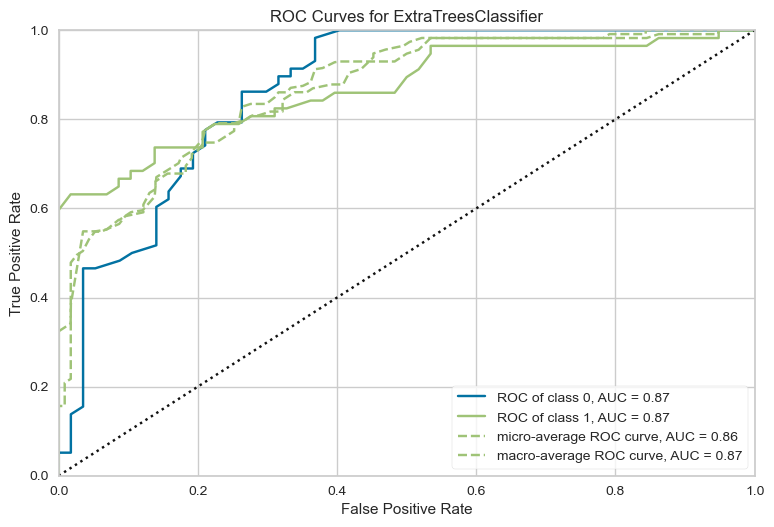

In [19]:
plot_model(et)

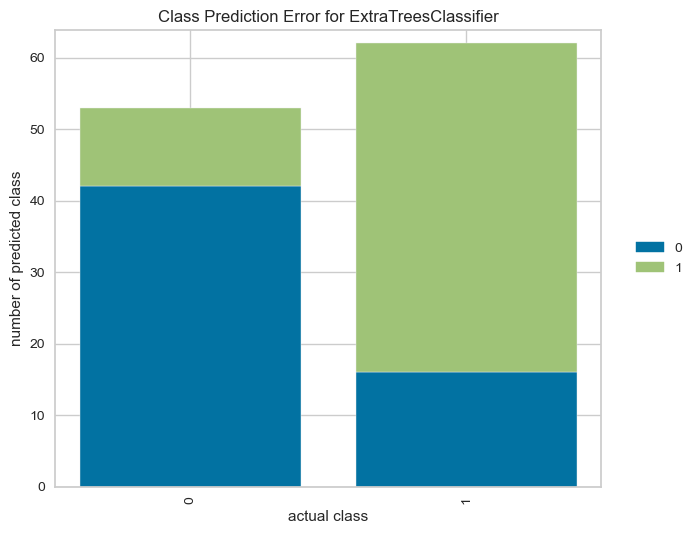

In [20]:
plot_model(et, plot = 'error')

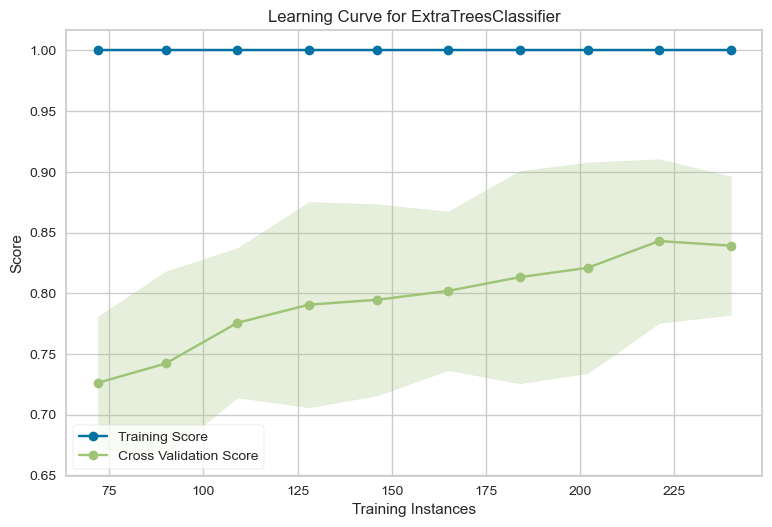

In [21]:
plot_model(et, plot = 'learning')

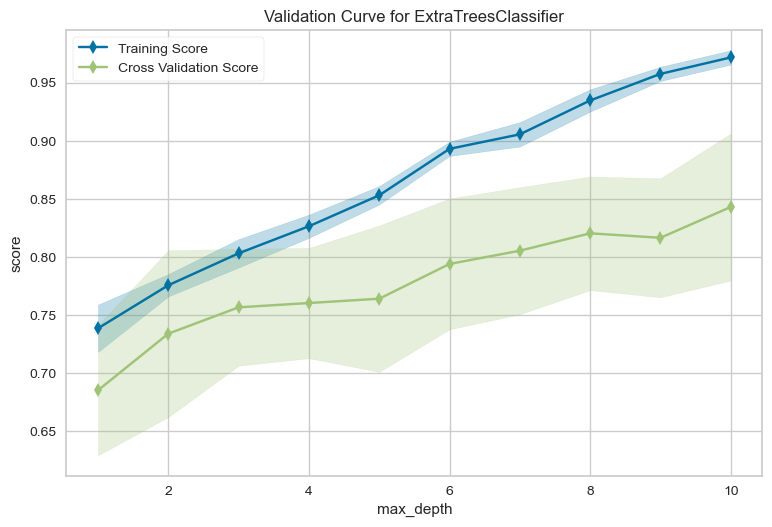

In [22]:
plot_model(et, plot = 'vc')

# 🏁 The End! Feel free to criticize! 🏁